<a href="https://colab.research.google.com/github/towardsai/ai-tutor-rag-system/blob/main/notebooks/Perplexity_Web_Api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

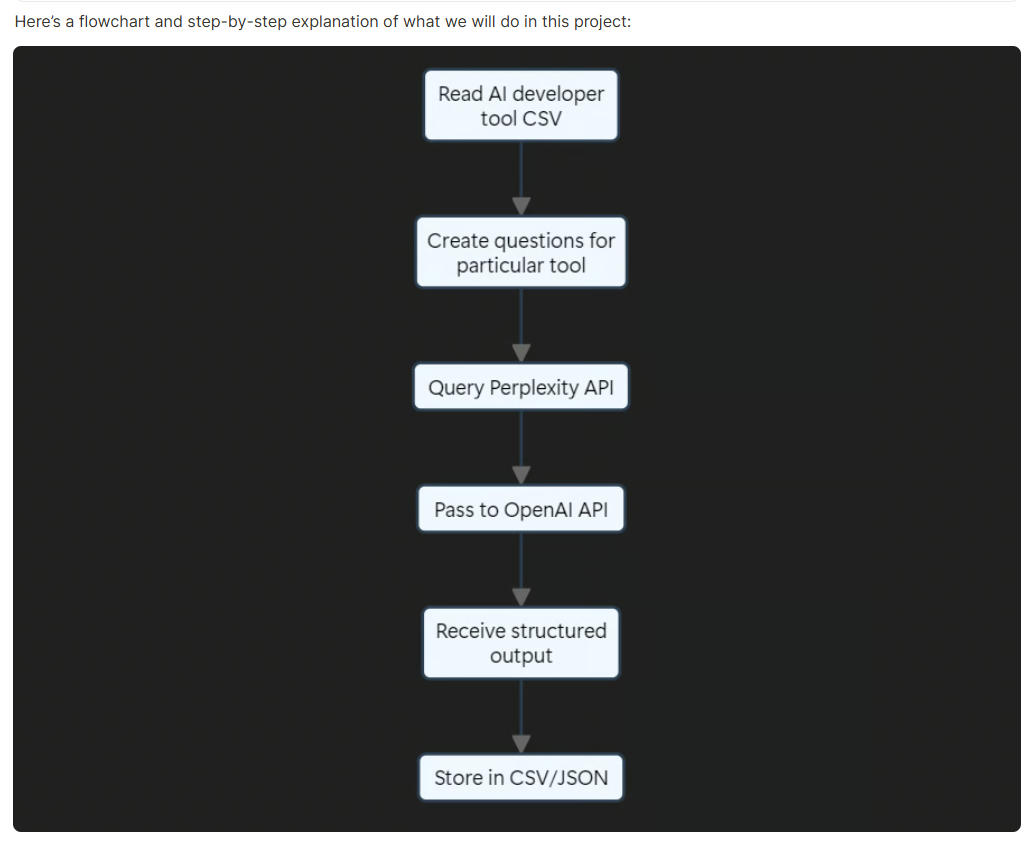

## Import neccessary library

requires-python = ">=3.13"  
dependencies = [  
        "dotenv>=0.9.9",  
    "jedi>=0.19.2",  
    "llama-index>=0.14.5",  
    "llama-index-llms-openai>=0.6.5",  
    "llama-index-llms-perplexity>=0.4.2",  
]

In [ ]:
# !pip install -q llama-index==0.14.0 llama-index-llms-perplexity==0.4.0 llama-index-llms-openai==0.5.4 jedi==0.19.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.3/303.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.4/144.4 kB 12.0 MB/s eta 0:00:00


## Setup Enviornment variables

In [12]:
import os

from dotenv import load_dotenv
load_dotenv(override=True)

# os.environ["OPENAI_API_KEY"] = "<OPENAI_API_KEY>"
# os.environ["PERPLEXITY_API_KEY"] = "<PERPLEXITY_API_KEY>"
# PERPLEXITY_API_KEY = os.environ["PERPLEXITY_API_KEY"]

# from google.colab import userdata
# os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
# os.environ["PERPLEXITY_API_KEY"] = userdata.get('PERPLEXITY_API_KEY')
# PERPLEXITY_API_KEY = userdata.get('PERPLEXITY_API_KEY')

True

## FlowDiagram
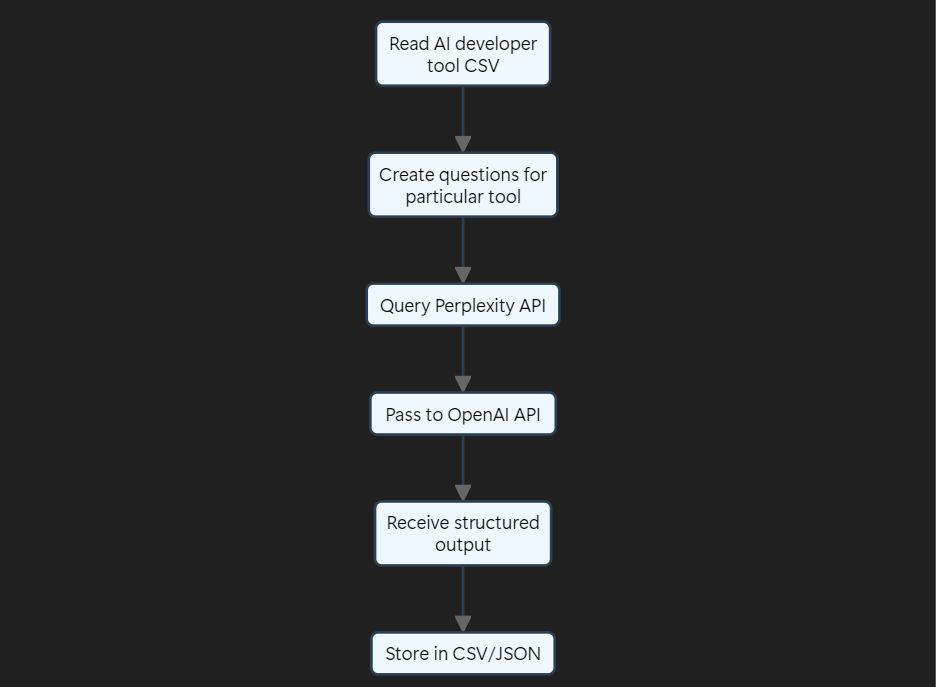

## Read the CSV for tool name

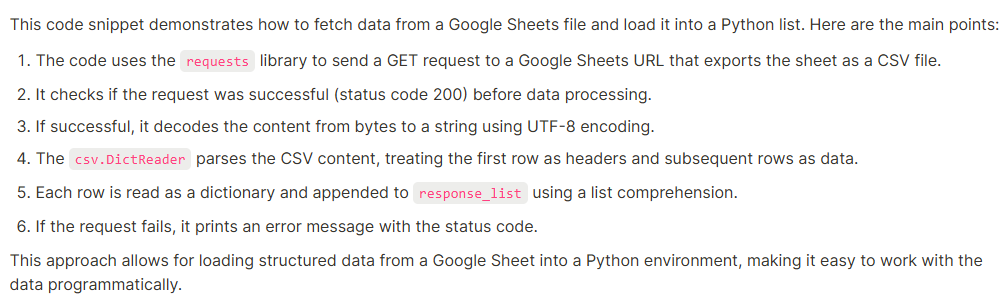

In [1]:
import requests
import csv

# Google Sheets file URL (CSV export link)
url = 'https://docs.google.com/spreadsheets/d/1gHB-aQJGt9Nl3cyOP2GorAkBI_Us2AqkYnfqrmejStc/export?format=csv'

# Send a GET request to fetch the CSV file
response = requests.get(url)

response_list = []
# Check if the request was successful
if response.status_code == 200:
    # Decode the content to a string
    content = response.content.decode('utf-8')

    # Use the csv.DictReader to read the content as a dictionary
    csv_reader = csv.DictReader(content.splitlines(), delimiter=',')
    response_list = [row for row in csv_reader]
else:
    print(f"Failed to retrieve the file: {response.status_code}")

In [2]:
response_list[0:3]

[{'Name': 'Microsoft Azure AI Platform',
  'Tool Type': 'Cloud Platform',
  'Parent': '',
  'Company': '',
  'Description': 'Cloud-based environment for training, deploying, automating, managing, and tracking ML models',
  'Category': 'Cloud ML Platform',
  'URL': 'https://azure.microsoft.com/en-us/products/machine-learning',
  'Is a direct URL company /tool website?': 'Yes',
  '': ''},
 {'Name': 'Vertex AI Platform',
  'Tool Type': 'Cloud Platform',
  'Parent': 'Google Cloud Platform',
  'Company': '',
  'Description': 'A Google Cloud platform for AI and machine learning development and deployment',
  'Category': 'GPUs and AI APIs',
  'URL': 'https://cloud.google.com/vertex-ai',
  'Is a direct URL company /tool website?': 'No',
  '': ''},
 {'Name': 'Google Cloud Platform',
  'Tool Type': 'Cloud Platform',
  'Parent': '',
  'Company': '',
  'Description': '',
  'Category': '',
  'URL': '',
  'Is a direct URL company /tool website?': '',
  '': ''}]

## Create the questions for tool name

In [3]:
def create_questions_list(tool_name):
    questions_list = [
    f"Describe the developer tool `{tool_name}` in detail. What type of product is it, what types of tasks it is used for? What are the key features and capabilities of the tool? Explain Briefly",
    f"""
    Given the information about {tool_name}:
    **Parent Tools or languages**: Give a comma separated list of direct parent software languages or tools it uses. eg for Autokeras this would be; Keras, Python.
    **Languages it supports**: [List the programming languages {tool_name} this tool can be imported into, based on official documentation]
    Explain Briefly""",
    f"What other software tools are used in conjunction with {tool_name}. Explain Briefly",
    f"What company built and owns {tool_name} Is the product open source? Explain Briefly",
    ]
    return questions_list

# Perplexity API

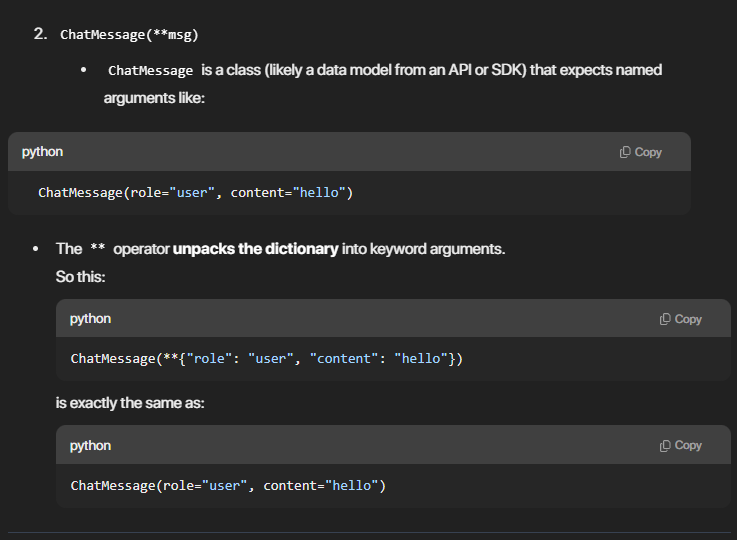

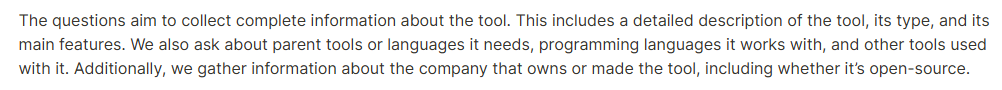

In [6]:
from llama_index.core.llms import ChatMessage
from llama_index.llms.perplexity import Perplexity

def get_response_from_perplexity(question: str, llm):
    """
    Get a response from Perplexity LLM for a given question.

    Args:
        question (str): The question to ask.
        llm: The Perplexity LLM instance.

    Returns:
        The response from the LLM.
    """
    messages_dict = [
    {"role": "system", "content": "Be Precise and concise"},
    {"role": "user", "content": question},
    ]
    messages = [ChatMessage(**msg) for msg in messages_dict]
    response = llm.chat(messages)
    return response

c:\DROPBOX\Документы\Карзановы\Андрей\__CHALLENGES\AI_Full_Stack_Developer\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'validate_default' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'validate_default' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(


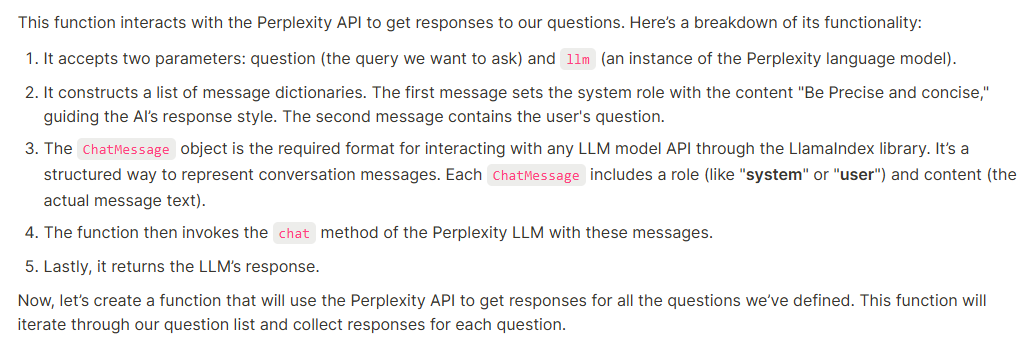

# Get Perplexity Response For particular tool

In [ ]:
# Get tool Response From perplexity

In [8]:
def get_tool_response_perplexity(llm, tool_name):
    # questions_list = [
    # f"Describe the developer tool `{tool_name}` in detail. What type of product is it, what types of tasks it is used for? What are the key features and capabilities of the tool? Explain Briefly",
    # f"""
    # Given the information about {tool_name}:
    # **Parent Tools or languages**: Give a comma separated list of direct parent software languages or tools it uses. eg for Autokeras this would be; Keras, Python.
    # **Languages it supports**: [List the programming languages {tool_name} this tool can be imported into, based on official documentation]
    # Explain Briefly""",
    # f"What other software tools are used in conjunction with {tool_name}. Explain Briefly",
    # f"What company built and owns {tool_name} Is the product open source? Explain Briefly",
    # ]
    questions_list = create_questions_list(tool_name)

    response_list = []
    for question in questions_list:
        response = get_response_from_perplexity(question, llm)
        answer = str(response)
        response_list.append({"question": question, "answer": str(response)})
    return response_list

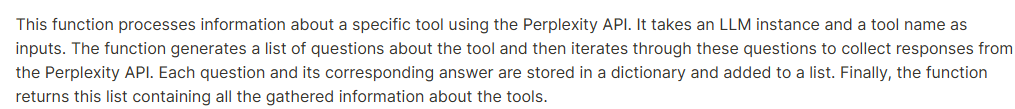

## Intialize Structured Output pydantic format


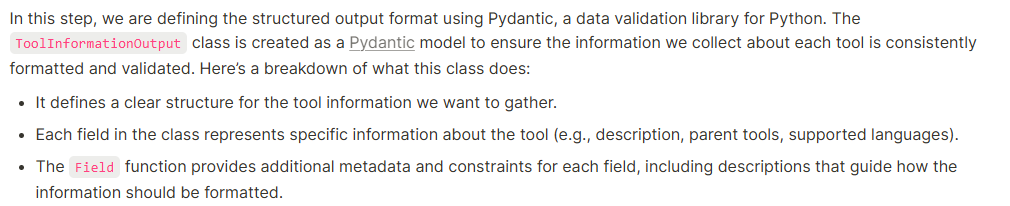

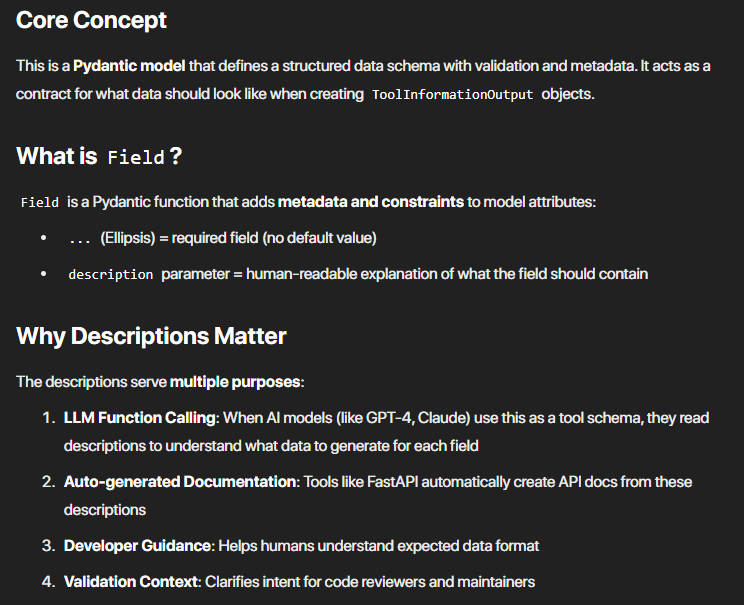

In [9]:
from pydantic import BaseModel, Field
class ToolInformationOutput(BaseModel):
    description: str = Field(..., description="Give a 4 sentence description of the tool in one full paragraph.")
    parent: str = Field(..., description="Give a comma separated list of direct parent software tools it uses / is dependent on.")
    languages: list[str] = Field(..., description="Give a comma separated list of compatible software languages.")
    mapping: list[str] = Field(..., description="Give a comma separated list of alternative spellings of this tool. Include acronyms (or full words if the acronym was given for the tool name)")
    category: list[str] = Field(..., description="Give a comma separated list of the types of task the product is used for. Use only 1-3 word category names not full complex sentences.")
    related_tools: list[str] = Field(..., description="What other tools is it compatible with? Give a comma separated list of the types of task the product is used for. Use only 1-3 word category names not full complex sentences.")
    company: str = Field(..., description="What company or organisation owns/builds the tool?")


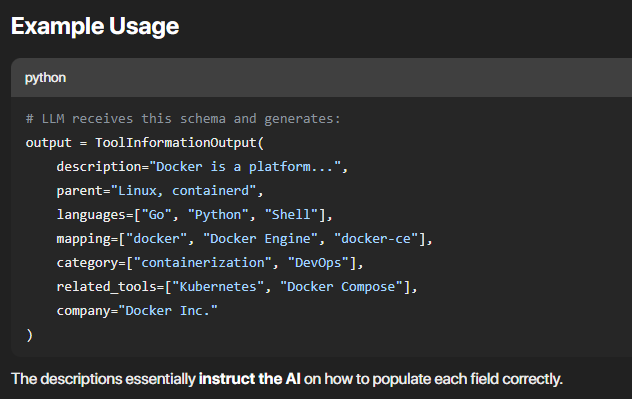

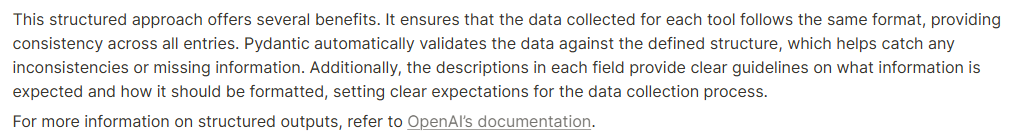

# Define System Prompt to get the output from open ai

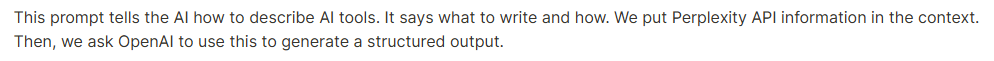

In [10]:
system_prompt = """
You have researched a specific AI developer tool which could be a tool, platform, library, framework, language or model (among others). You will output information about this in this specific format:

Here are some further instructions;
Don’t use over the top or dramatic language like groundbreaking, mindblowing etc.
Don’t use strong terms like “amazing”, “intriguing”, “fascinating”, “must-read”, or “outstanding”.
Do NOT use these words; “embarking”, “delve”, “vibrant”, “realm”, “endeavour” or “dive into”.

Fields should only be filled if the information is available in the following context. Otherwise, leave the field empty.
Here are the source materials from you research to use:
{context}
"""

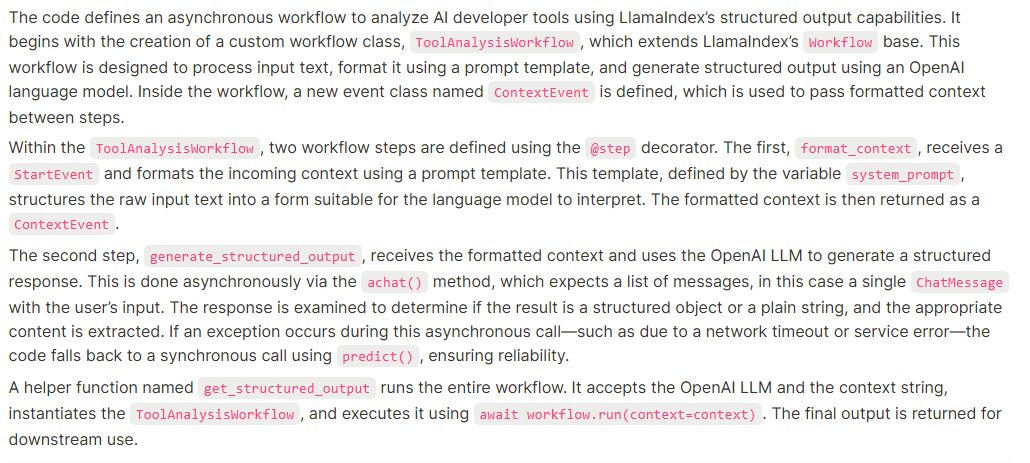

In [11]:
from llama_index.core.workflow import Event, StartEvent, StopEvent, Workflow, step
from llama_index.core import PromptTemplate
from llama_index.core.llms import ChatMessage

class ContextEvent(Event):
    context: str

class ToolAnalysisWorkflow(Workflow):
    def __init__(self, openai_llm):
        super().__init__()
        self.openai_llm = openai_llm
        self.prompt_template = PromptTemplate(template=system_prompt)
        self.structured_llm = openai_llm.as_structured_llm(ToolInformationOutput)

    @step
    async def format_context(self, ev: StartEvent) -> ContextEvent:
        """Format the context using the prompt template."""
        formatted_prompt = self.prompt_template.format(context=ev.context)
        return ContextEvent(context=formatted_prompt)

    @step
    async def generate_structured_output(self, ev: ContextEvent) -> StopEvent:
        """Generate structured output using the LLM."""
        try:
            # Convert string to ChatMessage format for achat
            messages = [ChatMessage(role="user", content=ev.context)]
            result = await self.structured_llm.achat(messages)

            # Extract the structured object from the response
            if hasattr(result, 'message') and hasattr(result.message, 'content'):
                # If content is already a structured object, return it
                if isinstance(result.message.content, ToolInformationOutput):
                    return StopEvent(result=result.message.content)
                else:
                    # If it's still a string, try to parse it
                    return StopEvent(result=result.message.content)
            else:
                return StopEvent(result=result)

        except Exception as e:
            # Fallback to synchronous structured predict
            result = self.structured_llm.predict(ev.context)
            return StopEvent(result=result)

async def get_structured_output(openai_llm, context):
    """
    Get structured output using Workflow instead of QueryPipeline.

    Args:
        openai_llm: The OpenAI LLM instance
        context: The context string to process

    Returns:
        Structured output from the workflow
    """
    workflow = ToolAnalysisWorkflow(openai_llm)
    result = await workflow.run(context=context)
    return result

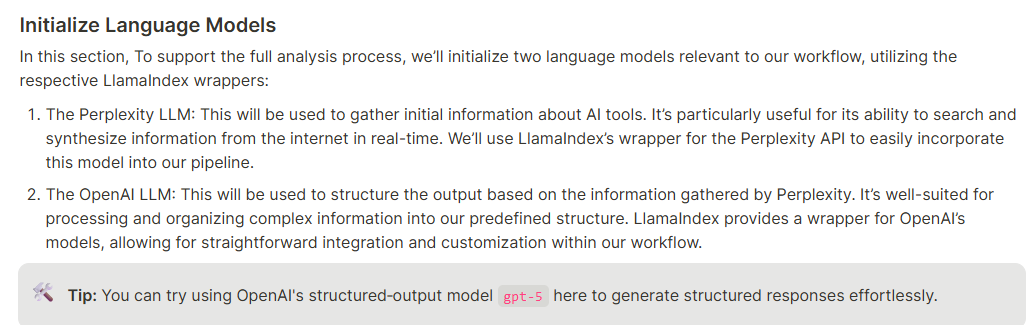

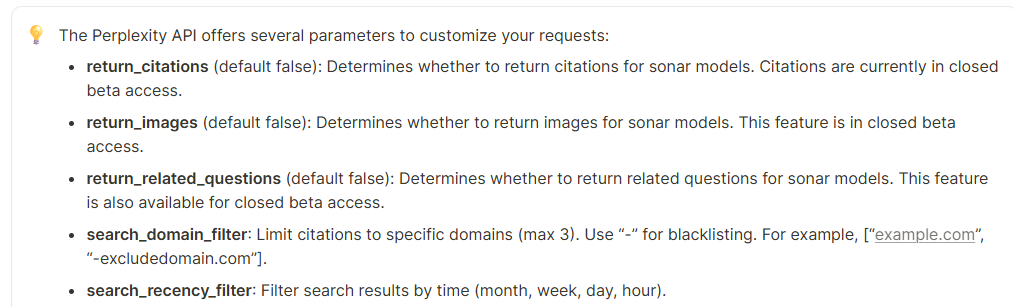

In [13]:
from llama_index.llms.perplexity import Perplexity
from llama_index.llms.openai import OpenAI
import asyncio
import json

# Initialize Perplexity LLM
perplexity_llm = Perplexity(
    api_key=os.getenv("PERPLEXITY_API_KEY"),
    model="sonar",
    temperature=0.2
)

# Initialize OpenAI LLM
openai_llm = OpenAI(model="gpt-5",additional_kwargs={"reasoning_effort": "minimal"})

# openai_llm = OpenAI(model="gpt-4o")

response_dict = {}

async def process_tools():
    """Process all tools asynchronously."""
    for csv_dict in response_list[:5]:
        tool_name = csv_dict.get("Name")
        try:
            perplexity_response = get_tool_response_perplexity(perplexity_llm, tool_name)
            context = "\n".join(response.get("answer") for response in perplexity_response)

            structured_output = await get_structured_output(openai_llm, context)

            try:
              output_dict = json.loads(str(structured_output))
            except json.JSONDecodeError:
              output_dict = {"error": "Failed to parse structured output", "raw_output": str(structured_output)}

            response_dict[tool_name] = output_dict
            print(f"Processed {tool_name}")
        except Exception as e:
            print(f"Error processing {tool_name}: {e}")
            response_dict[tool_name] = {"error": str(e)}


await process_tools()

Processed Microsoft Azure AI Platform
Processed Vertex AI Platform
Processed Google Cloud Platform
Processed DataRobot Enterprise AI Platform
Processed Google AI Studio


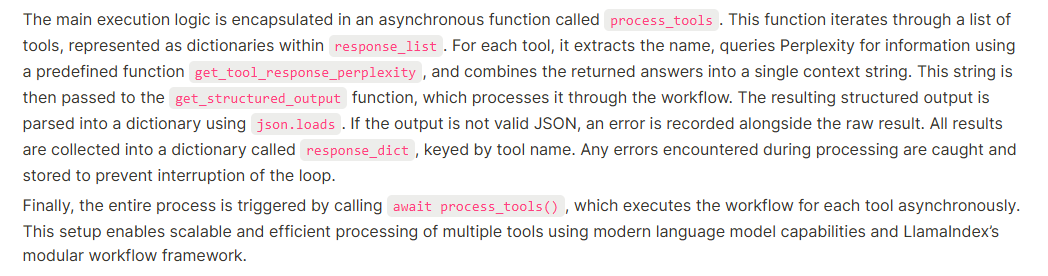

### Using QueryPipeline (feature-freeze/deprecation phase)

In [ ]:
# from llama_index.core.query_pipeline import QueryPipeline
# from llama_index.core import PromptTemplate

# def get_structured_output(openai_llm, context):
#     prompt_template = PromptTemplate(
#         template=system_prompt,
#     )

#     # you can get structured output in llamaindex by using the below code.
#     structured_llm = openai_llm.as_structured_llm(ToolInformationOutput)
#     p = QueryPipeline(chain=[prompt_template, structured_llm])
#     result = p.run(context)
#     return result

In [ ]:
# from llama_index.llms.openai import OpenAI
# from llama_index.llms.perplexity import Perplexity

# perplexity_llm = Perplexity(
#     api_key=PERPLEXITY_API_KEY, model="sonar", temperature=0.2
# )
# openai_llm = OpenAI(model="gpt-5-chat-latest", temprature=0.1)

# response_dict = {}

# # Here we will process only 5 tools for demonstration purpose.
# # You can process all the tools by removing the slicing [0:5], but you'll
# # use the API more, thus incurring in higher costs. Be careful with that and
# # always check the costs of the APIs you are using.
# for csv_dict in response_list[0:5]:
#     tool_name = csv_dict.get("Name")
#     try:
#         perplexity_response = get_tool_response_perplexity(perplexity_llm, tool_name)
#         # get all the answer response of perplexity and create the context to pass it in llm.
#         context = "\n".join(response.get("answer") for response in perplexity_response)
#         structured_output = get_structured_output(openai_llm, context)
#         # convert pydantic into json
#         output_dict = structured_output.model_dump()
#         response_dict[tool_name] = output_dict
#         print(f"Processed {tool_name}")
#     except Exception as e:
#         print(f"Error processing {tool_name}: {e}")

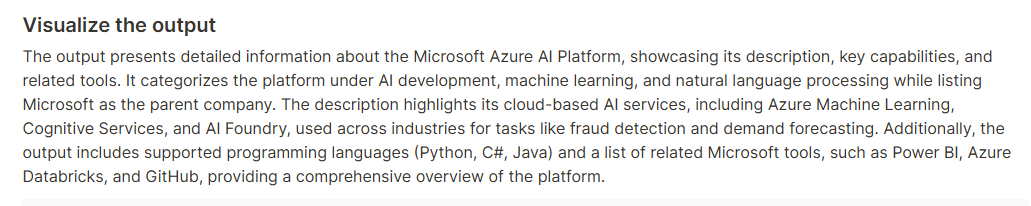

In [ ]:
import pprint
# Lets Visualize the result
for tool_name, tool_info in response_dict.items():
    print(f"Tool Name: {tool_name}")
    print(f"Description: {tool_info.get('description', 'N/A')}")
    pprint.pprint(tool_info)
    break # print only first tool info for brevity

Tool Name: Microsoft Azure AI Platform
Description: Microsoft Azure AI Platform is a cloud-based suite of AI services within Azure for building, training, deploying, and managing AI applications. It includes Azure Machine Learning, Cognitive Services, Azure OpenAI Service, and Azure Bot Service, supporting end-to-end workflows from data preparation to monitoring. The platform integrates with enterprise-grade security, compliance, and scalability features, and connects with tools like Azure Databricks, Synapse, and Kubernetes. It supports both prebuilt APIs and custom model development, enabling use cases across NLP, computer vision, speech, search, and generative AI.
{'category': ['Machine learning',
              'Computer vision',
              'NLP',
              'Conversational AI',
              'MLOps',
              'Generative AI',
              'Document AI',
              'Search'],
 'company': 'Microsoft Corporation',
 'description': 'Microsoft Azure AI Platform is a cloud-

## Store the structured output in csv

In [ ]:
import csv
import os

# Function to check if file exists
def file_exists(filename):
    return os.path.isfile(filename)

# Create a list to store the data for the CSV
data = []

# Iterate over the tool_output_dict
for tool_name, tool_info in response_dict.items():
    # Extract the relevant information
    description = tool_info.get("description", "")
    parent = tool_info.get("parent", "")
    languages = ", ".join(tool_info.get("languages", []))
    mapping = ", ".join(tool_info.get("mapping", []))
    category = ", ".join(tool_info.get("category", []))
    related_tools = ", ".join(tool_info.get("related_tools", []))
    company = tool_info.get("company", "")

    # Add the data for the current tool to the list
    data.append([tool_name, description, parent, languages, mapping, category, related_tools, company])

# Write or append the data to the CSV file
tool_output_filename = '05_03_ool_output.csv'
file_exists_flag = file_exists(tool_output_filename)

with open(tool_output_filename, 'a' if file_exists_flag else 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header only if the file is being created for the first time
    if not file_exists_flag:
        writer.writerow(["Tool Name", "Description", "Parent", "Languages", "Mapping", "Category", "Related Tools", "Company"])

    # Append the data rows
    writer.writerows(data)


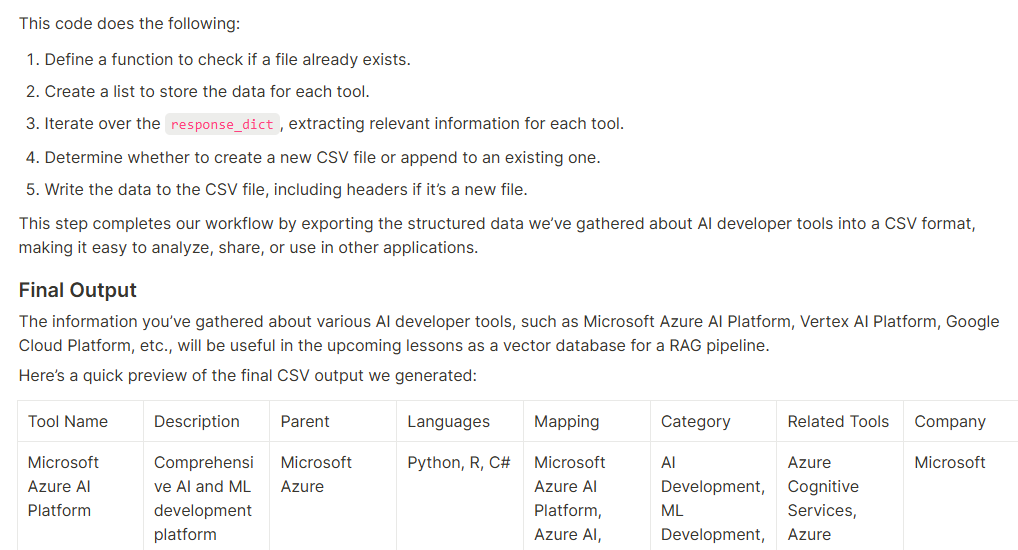

## END

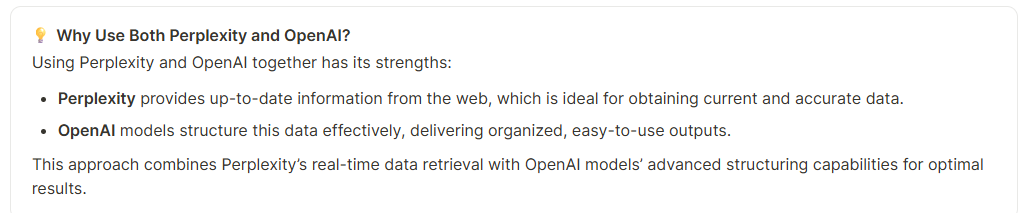

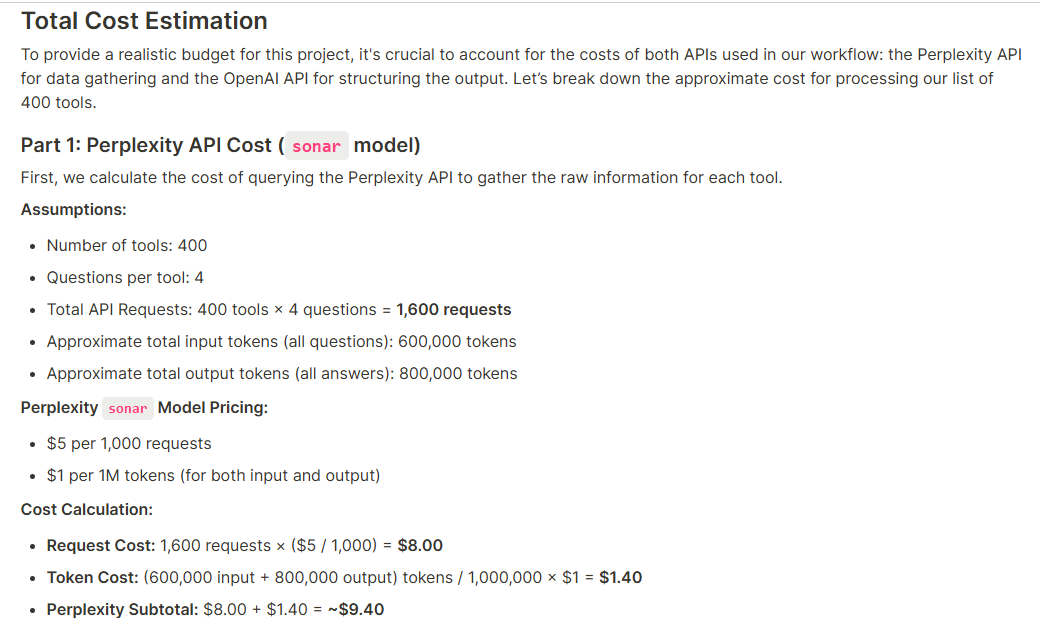

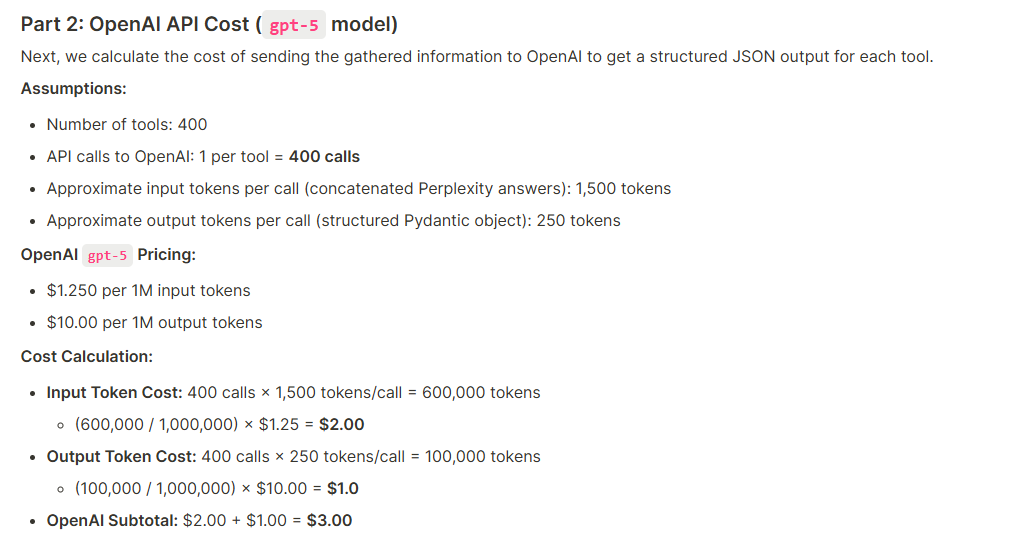

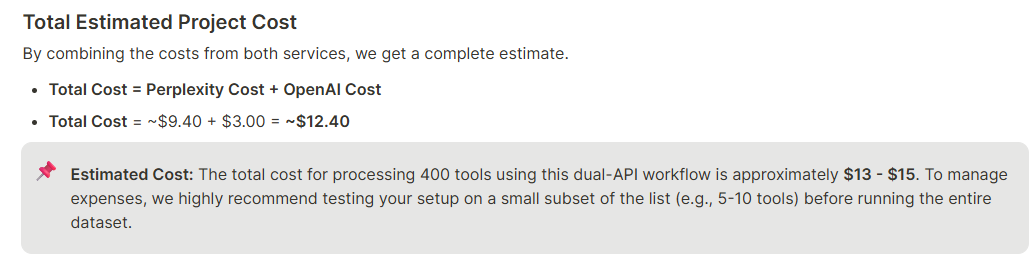